In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

my_imfilter:
* support grayscale and color images 
* support arbitrary shaped filters, as long as both dimensions are odd (e.g. 7x9 filters but not 4x5 filters) 
* pad the input image with zeros or reflected image content
* return a filtered image which is the same resolution as the input image

In [2]:
def my_imfilter(image, kernel, edge='pad'):
    # get shapes and sizes
    if image.ndim==2: # grayscale
        m,n = image.shape
        l = 1
        image = image.reshape(m,n,1)
    else: # RGB
        m,n,l = image.shape
    assert(kernel.shape[0] %2 != 0) # must be odd
    assert(kernel.shape[1] %2 != 0) # must be odd
    k1 = int((kernel.shape[0]-1)/2)
    k2 = int((kernel.shape[1]-1)/2)
    
    kernel_sum = np.sum(kernel)
    if(kernel_sum <= 0):
        kernel_sum = 1
    
    # apply padding to image
    if edge=='pad': # zero-padding
        for i in range(k1):
            image = np.vstack((np.zeros((1,n,l)), image, np.zeros((1,n,l))))
        for i in range(k2):
            image = np.hstack((np.zeros((m+2*k1,1,l)), image, np.zeros((m+2*k1,1,l))))
    elif edge=='reflection': # copy from image
        for i in range(k1):
            image = np.vstack((image[i,:,:].reshape(1,-1,l), image, image[i,:,:].reshape(1,-1,l)))
        for i in range(k2):
            image = np.hstack((image[:,i,:].reshape(-1,1,l), image, image[:,i,:].reshape(-1,1,l)))
    else:
        raise("boundary condition not recogized; options are pad and reflection")
        
    # initialize output image
    G = np.zeros(image.shape)
        
    # apply kernel
    for k in range(l):
        for i in range(0,m+k1):
            for j in range(0,n+k2):
                val = 0
                if(k1 == 0 and k2 == 0):
                    val = kernel[0,0]*image[i,j,k]
                elif(k1 == 0):
                    for v in range(-k2,k2+1):
                        val += (kernel[0,1-v]*image[i, j-v, k])
                elif(k2 == 0):
                    for u in range(-k1,k1+1):
                        val += (kernel[1-u,0]*image[i-u, j, k])
                else:
                    for u in range(-k1,k1+1):
                        for v in range(-k2,k2+1):
                            val += (kernel[1-u,1-v]*image[i-u, j-v, k])
                G[i,j,k] = val/kernel_sum
            
    # remove padding
    G = G[k1:m+k1,k2:n+k2]
    
    # if grayscale remove extra dimension
    if l==1:
        G = G.reshape(G.shape[0],G.shape[1])
    
    return G

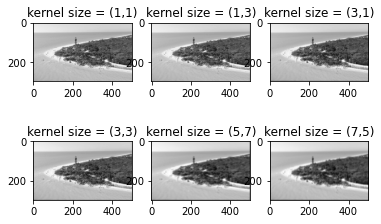

In [3]:
# test grayscale w/ zero-padding

image = (cv2.imread('sanibel.jpg',0)).astype(np.float)
sizes = [(1,1),(1,3),(3,1),(3,3),(5,7),(7,5)]
i = 1

for s in sizes:
    kernel = np.random.randint(0,10,s)
    res = my_imfilter(image, kernel)
    
    plt.subplot(2,3,i)
    plt.imshow(res, cmap='gray')
    plt.title("kernel size = (%i,%i)"%(s[0],s[1]))
    i = i+1

plt.show()

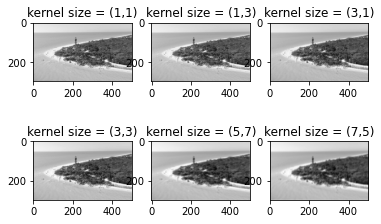

In [4]:
# test grayscale w/ reflection padding
image = (cv2.imread('sanibel.jpg',0)).astype(np.float)
sizes = [(1,1),(1,3),(3,1),(3,3),(5,7),(7,5)]
i = 1

for s in sizes:
    kernel = np.random.randint(0,10,s)
    res = my_imfilter(image, kernel, edge='reflection')
    
    plt.subplot(2,3,i)
    plt.imshow(res, cmap='gray')
    plt.title("kernel size = (%i,%i)"%(s[0],s[1]))
    i = i+1

plt.show()

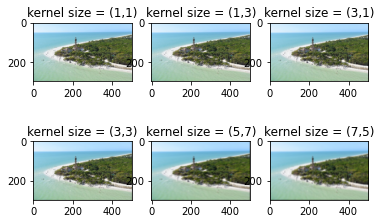

In [5]:
# test RGB w/ zero-padding
image = cv2.imread('sanibel.jpg').astype(np.float)
sizes = [(1,1),(1,3),(3,1),(3,3),(5,7),(7,5)]
i = 1

for s in sizes:
    kernel = np.random.randint(0,10,s)
    res = my_imfilter(image, kernel)
    
    res_show = (res - np.min(res)) / (np.max(res) - np.min(res))
    
    plt.subplot(2,3,i)
    plt.imshow(res_show[...,::-1])
    plt.title("kernel size = (%i,%i)"%(s[0],s[1]))
    i = i+1

plt.show()

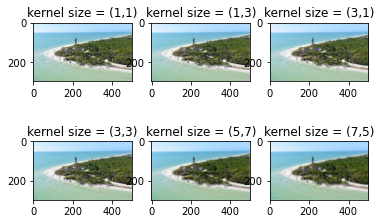

In [6]:
# test RGB w/ reflection padding
image = cv2.imread('sanibel.jpg').astype(np.float)
sizes = [(1,1),(1,3),(3,1),(3,3),(5,7),(7,5)]
i = 1

for s in sizes:
    kernel = np.random.randint(0,10,s)
    res = my_imfilter(image, kernel, edge='reflection')
    
    res_show = (res - np.min(res)) / (np.max(res) - np.min(res))
    
    plt.subplot(2,3,i)
    plt.imshow(res_show[...,::-1])
    plt.title("kernel size = (%i,%i)"%(s[0],s[1]))
    i = i+1

plt.show()

Application of Different Types of Kernels

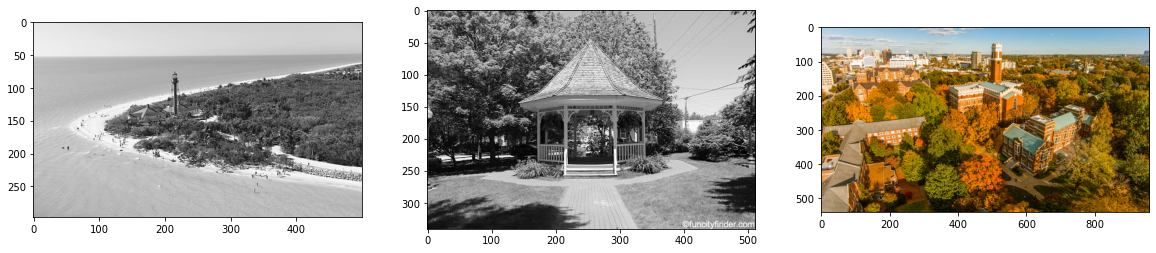

In [7]:
# original images
image1 = cv2.imread('sanibel.jpg',0).astype(np.float)
image2 = cv2.imread('zionsville.jpg',0).astype(np.float)
image3 = cv2.imread('vanderbilt.jpg').astype(np.float)

im3_show = (image3 - np.min(image3)) / (np.max(image3) - np.min(image3))

plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(image1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(image2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(im3_show[...,::-1])
plt.show()

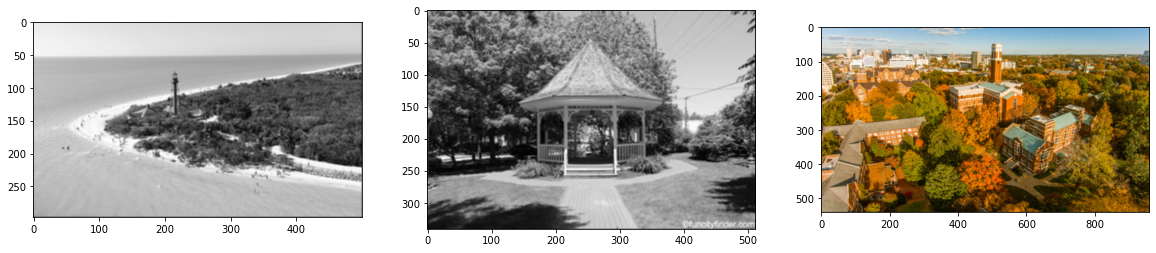

In [8]:
# mean kernel
kernel = np.asarray([[1,1,1],[1,1,1],[1,1,1]]).astype(np.float)

res1 = my_imfilter(image1, kernel)
res2 = my_imfilter(image2, kernel)
res3 = my_imfilter(image3, kernel)

res3_show = (res3 - np.min(res3)) / (np.max(res3) - np.min(res3))

plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(res1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(res2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(res3_show[...,::-1])
plt.show()

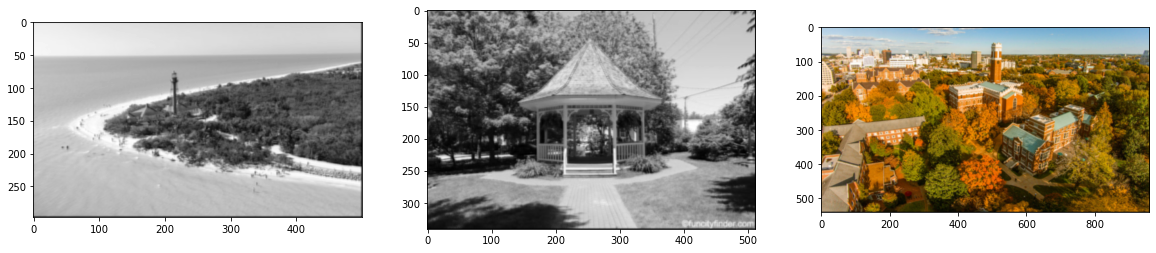

In [9]:
# gaussian kernel
kernel = np.asarray([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]]).astype(np.float)

res1 = my_imfilter(image1, kernel)
res2 = my_imfilter(image2, kernel)
res3 = my_imfilter(image3, kernel)

res3_show = (res3 - np.min(res3)) / (np.max(res3) - np.min(res3))

plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(res1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(res2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(res3_show[...,::-1])
plt.show()

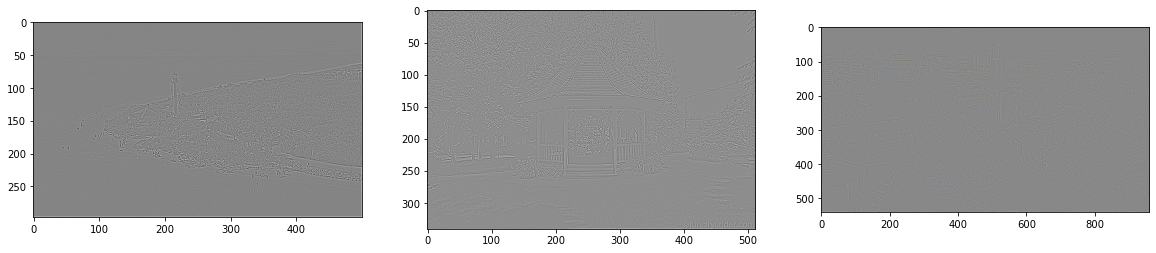

In [10]:
# laplacian kernel
kernel = np.asarray([[0,-1,0],[-1,4,-1],[0,-1,0]]).astype(np.float)

res1 = my_imfilter(image1, kernel)
res2 = my_imfilter(image2, kernel)
res3 = my_imfilter(image3, kernel)

res3_show = (res3 - np.min(res3)) / (np.max(res3) - np.min(res3))

plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(res1, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(res2, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(res3_show[...,::-1])
plt.show()